

---

# **Data Preparation**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload

In [3]:
df = pd.read_csv('/content/churn.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

*   Berisikan informasi tentang 10.000 pengguna bank
*   Tidak ditemukan nilai kosong
*   Ada 3 data yang tidak termasuk numerikal maupun kategorikal


In [7]:
df.drop(columns = ['RowNumber','Surname', 'CustomerId'], inplace=True)


In [8]:
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)
df['Balance'] = df['Balance'].astype(int)

In [9]:
le = LabelEncoder()
lstforle = ['Geography', 'Gender']
for i in lstforle :
    df[i] = le.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',
          le.inverse_transform(df[i].unique()))

Geography  :  [0 2 1]  =  ['France' 'Spain' 'Germany']
Gender  :  [0 1]  =  ['Female' 'Male']


In [10]:
df.shape

(10000, 11)

# **EDA**


Mengidentifikasi hubungan dan korelasi antar variabel

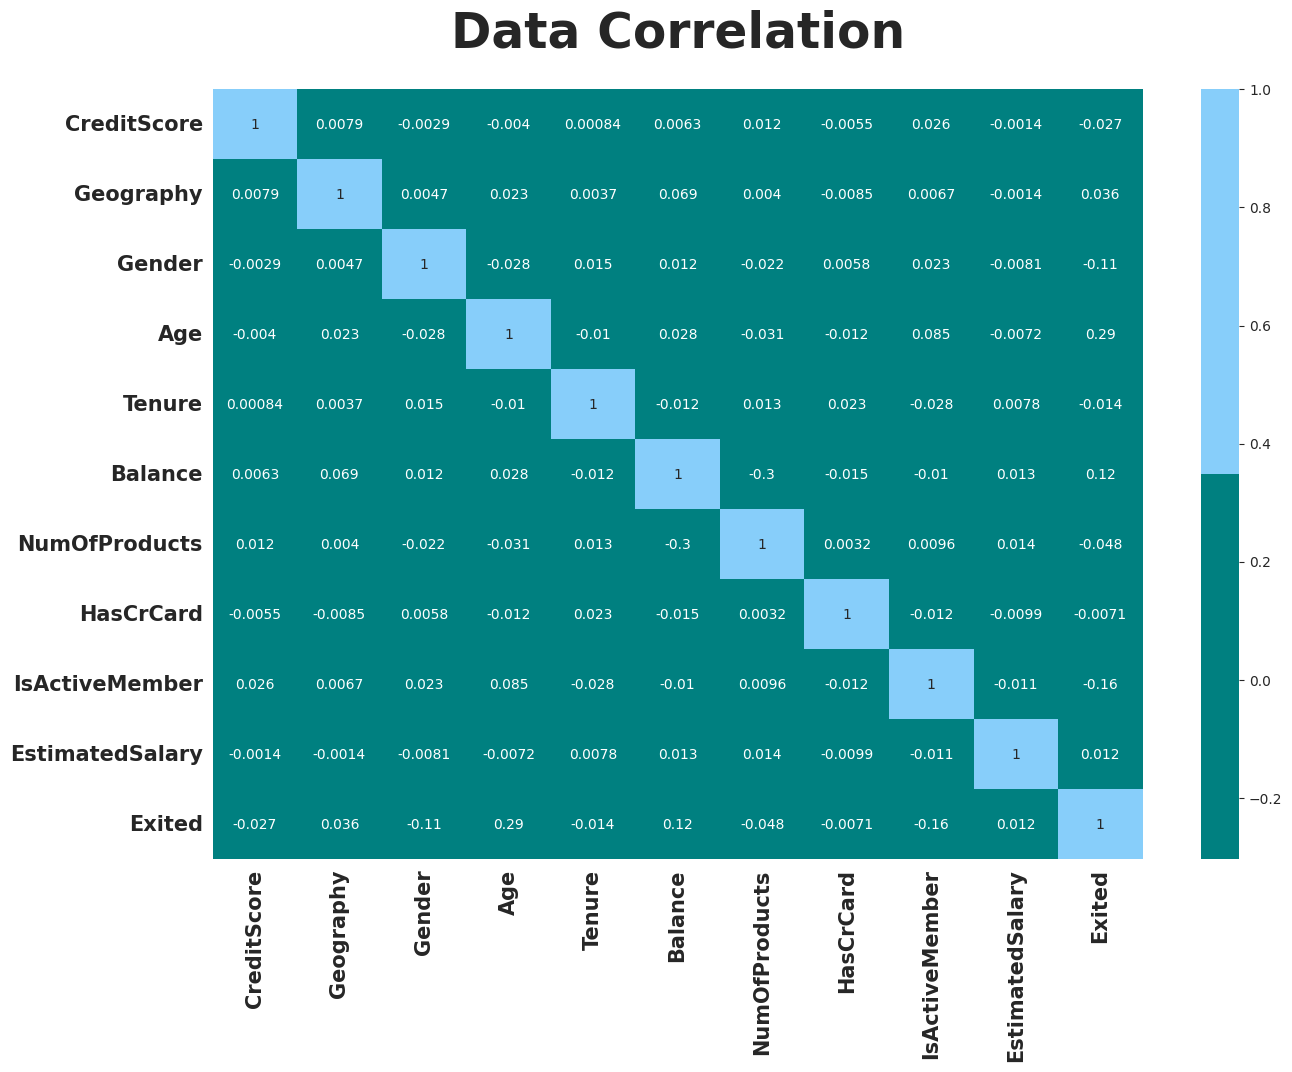

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),
            cmap = ['#008080','#87CEFA'], annot=True)
plt.title("Data Correlation", weight="bold", fontsize=35, pad=30)
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15);

In [12]:
data_numeric = df.describe(include=[np.number])
data_numeric

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.571500,1.530200,0.70550,0.515100,100089.748400,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.185107,0.581654,0.45584,0.499797,57510.491042,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.000000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51001.750000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.000000,1.000000,1.00000,1.000000,100193.500000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127643.750000,2.000000,1.00000,1.000000,149387.750000,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,1.000000


*   Credit score memiliki hubungan korelasi positif dengan IsActiveMember
*   Hubungan antara Balance dan NumOfProducts sangat menonjol.
*   Tenure dan HasCrCard memiliki hubungan korelasi paling rendah diantara yang lainnya.





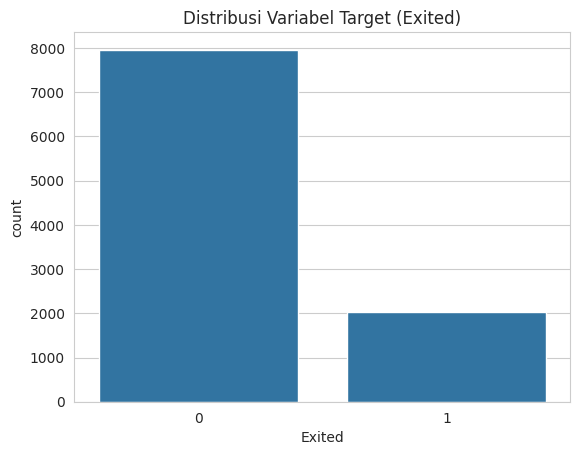

In [13]:
sns.countplot(x='Exited', data=df)
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

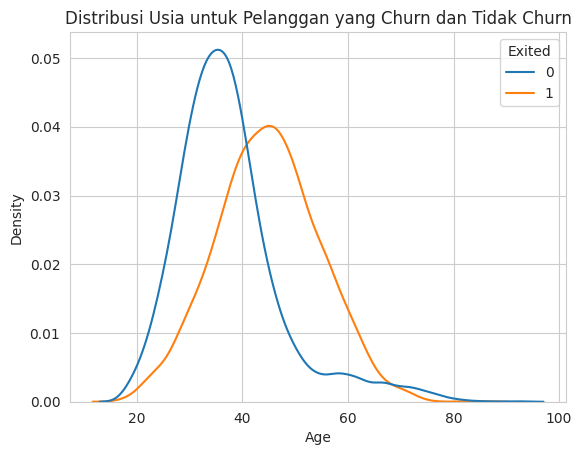

In [14]:
sns.kdeplot(data=df, x='Age', hue='Exited', common_norm=False)
plt.title('Distribusi Usia untuk Pelanggan yang Churn dan Tidak Churn')
plt.show()

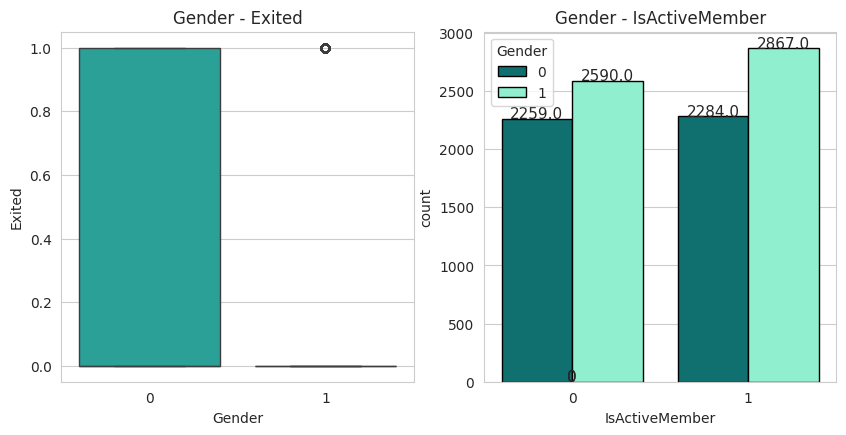

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(2, 2, 1)
sns.boxplot(data = df,
                x = 'Gender',
                y='Exited',
                color = '#17b3a8'
                )
plt.title('Gender - Exited')

plt.subplot(2, 2, 2)
ax = sns.countplot(x = 'IsActiveMember',data = df,hue = "Gender",palette = [ '#008080', '#7FFFD4'],edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),\
            horizontalalignment='center', fontsize = 11)
plt.title('Gender - IsActiveMember');

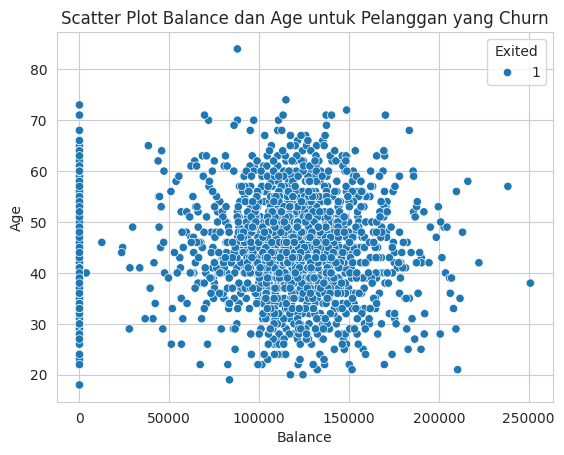

In [16]:
sns.scatterplot(x='Balance', y='Age', hue='Exited', data=df[df['Exited'] == 1])
plt.title('Scatter Plot Balance dan Age untuk Pelanggan yang Churn')
plt.show()

Text(0.5, 1.0, 'IsActiveMember - Age')

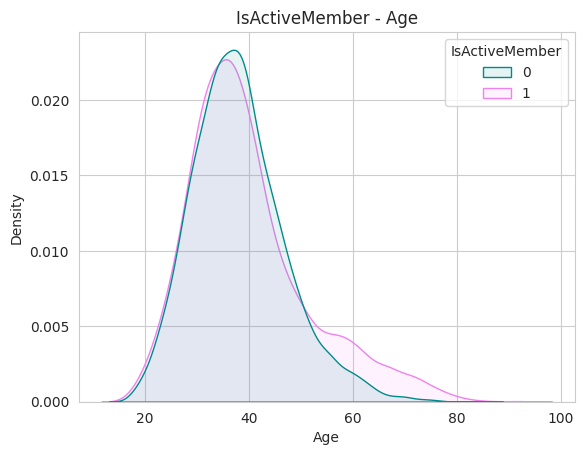

In [17]:
sns.kdeplot(data = df,
                x = 'Age',
                fill = True,
                alpha = 0.1,
                hue = 'IsActiveMember',
                palette = [ '#008B8B', '#EE82EE',]
                )
plt.title('IsActiveMember - Age')

In [18]:
from scipy.stats import ttest_ind

churn_group = df[df['Exited'] == 1]['Balance']
not_churn_group = df[df['Exited'] == 0]['Balance']

t_stat, p_value = ttest_ind(churn_group, not_churn_group)
print(f'T-Statistic: {t_stat}, p-value: {p_value}')

T-Statistic: 11.936238174316943, p-value: 1.275595450369167e-32


In [19]:
mean_age_churn = df[df['Exited'] == 1]['Age'].mean()
mean_age_not_churn = df[df['Exited'] == 0]['Age'].mean()

print(f'Rata-rata Umur Pelanggan yang Churn: {mean_age_churn}')
print(f'Rata-rata Umur Pelanggan yang Tidak Churn: {mean_age_not_churn}')

Rata-rata Umur Pelanggan yang Churn: 44.8379970544919
Rata-rata Umur Pelanggan yang Tidak Churn: 37.40838879819164


faktor usia dan jenis kelamin memiliki pengaruh signifikan terhadap keputusan pelanggan untuk keluar dari layanan bank. Lebih khusus, pelanggan yang lebih tua dan pelanggan perempuan cenderung memiliki kecenderungan untuk keluar.

In [20]:
features = df[['CreditScore', 'Age','Tenure',
                'Balance',
                'NumOfProducts', 'EstimatedSalary', 'Geography',
                'Gender','HasCrCard', 'IsActiveMember']]
target = df['Exited']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [22]:
scaler = StandardScaler().fit(x_train)
scaler_x = scaler.transform(x_train)

model = RandomForestClassifier(n_estimators=40, random_state=42)
model.fit(scaler_x, y_train)

scaledx_test = scaler.transform(x_test)
y_pred = model.predict(scaledx_test)

In [23]:
accuracy_mean = accuracy_score(y_test, y_pred)
accuracy_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_mean)
print("Confusion Matrix:\n", accuracy_matrix)

y_pred_new_data = model.predict(scaler.transform(features))
print("Accuracy on new data:", accuracy_score(target, y_pred_new_data))

Accuracy: 0.8605
Confusion Matrix:
 [[1541   66]
 [ 213  180]]
Accuracy on new data: 0.9712


**Dan hasil akurasi terakhirnya sudah didapatkan 97.12%**

# **KESIMPULAN**

*   Rata-rata usia klien perempuan sedikit lebih tinggi dibandingkan usia klien laki-laki
*   Kemungkinan kehilangan klien aktif lebih kecil dibandingkan klien tidak aktif
*   Pria 10% lebih aktif dibandingkan wanita
*   Klien berusia antara 50 dan 80 tahun adalah yang paling aktif





